**Introduction**

Steam is a digital distribution platform developed by Valve Corporation that offers digital rights management (DRM), multiplayer games, and social networking services. It was first released in September 2003 as a way for Valve to provide automatic updates for its own games, but was eventually expanded to include games from third-party publishers. Steam allows users to purchase and download games as well as other software and content. Steam also includes a number of features for developers, such as the ability to distribute and market their own games on the platform, access to analytics and user data, as well as tools to create and manage in-game items and virtual currencies. Overall, Steam is a widely used platform that has become an integral part of the gaming industry, providing gamers with an easy and convenient way to purchase and play games, while also offering a range of features and tools for developers.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats





***Priprema*** ***Podataka***
- head()
- read_csv()
- info()
- isna().sum()


In [ ]:
df = pd.read_csv('/steam_data.csv')

Pregled podataka

In [ ]:
df.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(151,281)- 96% of the 1...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(90,780)- 88% of the 90,780 user ...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-,-
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(32,436)- 84% of the 32,436 user ...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(5,359)- 91% of the 5,359 user re...","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...,https://steamstore-a.akamaihd.net/public/share...
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(9,147)- 87% of the 9,147 user re...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/share...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81048 entries, 0 to 81047
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           81048 non-null  object
 1   name          81043 non-null  object
 2   categories    80453 non-null  object
 3   img_url       81048 non-null  object
 4   user_reviews  81048 non-null  object
 5   all_reviews   81046 non-null  object
 6   date          81046 non-null  object
 7   developer     81046 non-null  object
 8   publisher     81048 non-null  object
 9   price         81048 non-null  object
 10  pegi          76765 non-null  object
 11  pegi_url      81048 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


In [ ]:
# Proveravamo da li nedostaju neke vrednosti
df.isna().sum()

url                0
name               5
categories       595
img_url            0
user_reviews       0
all_reviews        2
date               2
developer          2
publisher          0
price              0
pegi            4283
pegi_url           0
dtype: int64

In [ ]:
df.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(151,281)- 96% of the 1...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(90,780)- 88% of the 90,780 user ...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-,-
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(32,436)- 84% of the 32,436 user ...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(5,359)- 91% of the 5,359 user re...","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...,https://steamstore-a.akamaihd.net/public/share...
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(9,147)- 87% of the 9,147 user re...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/share...


***Čišćenje*** ***Podataka***

Podaci se moraju očistiti. Moramo da izdvojimo procenat pregleda, brojeve pregleda i cenu iz kolona all_revievs i cena. Postoje neke duple vrednosti i vrednosti koje nedostaju.


Prvo ćemo izbaciti neiskorišćene kolone iz tabele

- duplicated()
- drop_duplicated()
- reset_index()
- count()
- columns.toList()
- remove()
- insert()
- reindex()
- option_context()
- display()
- search()
- group()
- where()
- match()


In [ ]:
# Brisemo originalne kolone
del df['user_reviews']
del df['pegi_url']

Provera i prebrojavanje duplih vrednosti

In [ ]:
# Proveravamo da li ima duplikata
df[df['name'].duplicated()]

,url,name,categories,img_url,all_reviews,date,developer,publisher,price,pegi
27,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-
28,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,-
29,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-
30,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of...
31,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence
...,...,...,...,...,...,...,...,...,...,...
81043,https://store.steampowered.com/bundle/2961/Ste...,-,-,-,-,-,-,-,Buy Steam: Rails to Riches - All Map Expansion...,-
81044,https://store.steampowered.com/bundle/3123/Det...,-,-,-,-,-,-,-,Buy Detective Hank and the Golden Sneeze - Gam...,-
81045,https://store.steampowered.com/bundle/3175/Fea...,-,-,-,-,-,-,-,-,-
81046,https://store.steampowered.com/bundle/3176/Fea...,-,-,-,-,-,-,-,-,-


In [ ]:
# Broj duplikata
df['name'].duplicated().sum()

16258

Ima preko 16000 duplih vrednosti. Moramo izbrisati te duplikate i restartovati index.

In [ ]:
# Brisanje duplikata
df.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [ ]:
# Restartovanje indexa
df.reset_index(drop=True, inplace=True)

In [ ]:
df.count()

url            64790
name           64789
categories     64310
img_url        64790
all_reviews    64788
date           64788
developer      64788
publisher      64790
price          64790
pegi           60815
dtype: int64

Sada cemo napraviti nove kolone za procenat pregleda, brojeve pregleda, godinu (za izdvajanje vrednosti godine) i druge kolone.

In [ ]:
# Pravljenje novih kolona
df['reviews'] = None
df['review_percentage'] = None
df['total_reviews'] = None
df['price_type'] = None
df['year'] = None

Promenićemo kolone price_type i year

In [ ]:
# Uzimamo listu trenutnih imena kolona
cols = df.columns.tolist()

# Brisemo zeljenu kolonu
cols.remove('price_type')

# Dodamo kolonu na odlucenoj poziciji
cols.insert(9, 'price_type')

# Reindexiramo podatke sa novom izmenom redova kolona
df = df.reindex(columns=cols)

In [ ]:
# Uzimamo listu trenutnih imena kolona
cols = df.columns.tolist()

# Brisemo zeljenu kolonu
cols.remove('year')

# Dodajemo kolonu na odlucenoj poziciji(index-u)
cols.insert(6, 'year')

# Reindexiramo podatke sa novom izmenom redova kolona
df = df.reindex(columns=cols)

Sada izdvajamo cenu iz kolone 'price' i azurirmao kolonu izvojenim vrednostima.

In [ ]:
# Ovo omogućava da se prikaže sav sadržaj kolone, čak i ako premašuje podrazumevanu maksimalnu širinu
with pd.option_context('display.max_colwidth', None):
    # Koristimo funkciju display() da prikažemo prvih 5 redova kolone „cena“.
    display(df['price'][:5])

0                                  Buy Among Us$4.99Add to Cart
1    Play Counter-Strike: Global OffensiveFree to PlayPlay Game
2                                Buy Fall Guys$19.99Add to Cart
3                       Buy Crusader Kings III$49.99Add to Cart
4                           Play Destiny 2Free To PlayPlay Game
Name: price, dtype: object

In [ ]:
def extract_price(text):
  # Koristimo funkciju pretrage da bismo pronašli prvu instancu cene u nizu
  result = re.search(r'\$\d+\.\d+', text)
  # Ako je pronađena cena, vratimo je
  if result:
    return result.group()[1:]
  # U suprotnom, vratimo None
  return 'Free to play'

In [ ]:
for index, row in df.iterrows():
    # Izvucemo cenu iz kolone „cena“ i ažuriramo vrednost u istoj koloni
    row['price'] = extract_price(row['price'])

In [ ]:
df['price'].head()

0            4.99
1    Free to play
2           19.99
3           49.99
4    Free to play
Name: price, dtype: object

In [ ]:
# Dodelimo "Free" gde je „Free to play“ i obrnuto
df['price_type'] = np.where(df['price'] == 'Free to play', 'Free', 'Paid')

In [ ]:
with pd.option_context('display.max_colwidth', None):
   display(df['all_reviews'][:5])

0    Overwhelmingly Positive(224,878)- 95% of the 224,878 user reviews for this game are positive.
1          Very Positive(4,843,904)- 87% of the 4,843,904 user reviews for this game are positive.
2              Very Positive(223,706)- 80% of the 223,706 user reviews for this game are positive.
3                Very Positive(18,951)- 92% of the 18,951 user reviews for this game are positive.
4              Very Positive(284,689)- 86% of the 284,689 user reviews for this game are positive.
Name: all_reviews, dtype: object

In [ ]:
def extract_reviews(text):
  text = str(text)
  # Koristimo funkciju pretrage da bismo pronašli prvu instancu broja pozitivnih u nizu
  result = re.search(r'\d+(?:,\d+)*', text)
  # Proverimo da li rezultat nije None i podudara se sa šablonom
  if result and not re.search(r'\b(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec'
                              r'January|February|March|April|May|June|July|August|September|October|November|December)'
                              r'\s\d{1,2},\s\d{4}\b', text):
    return result.group()
  # Suprotonom vraca None
  return None

In [ ]:
# Primer
extract_reviews(df['all_reviews'][0])

'224,878'

In [ ]:
def extract_percentage(text):
  text = str(text)
  #  Koristimo funkciju pretrage da bismo pronašli prvu instancu procenta pozitivnih.
  result = re.search(r'\d+%', text)
  # Ako je procenat pronadjen vratimo ga
  if result:
    return result.group()
  # Suprotnom vratimo None
  return None

In [ ]:
# Primer
extract_percentage(df['all_reviews'][0])

'95%'

In [ ]:
def clean_reviews(df):
    # Konvertujemo input df podataka u string
    df = str(df)
    # Proverimo da li se niz podudara sa određenim obrascem datuma
    if re.match(r'\b(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec'
                r'January|February|March|April|May|June|July|August|September|October|November|December)'
                r'\s\d{1,2},\s\d{4}\b', df):
        return None
    else:
        # Podelimo string sa '(' i vratimo prvi element
        reviews = df.split('(')[0]
    # Vratimo procišćen podatak
    return reviews

In [ ]:
# Primer
clean_reviews(df['all_reviews'][0])

'Overwhelmingly Positive'

In [ ]:
for index, rows in df.iterrows():
    # Izdvojimo recenziju iz kolone „all_revievs“ i dodajemo je u novu kolonu
    rows['reviews'] = clean_reviews(rows['all_reviews'])
    # Izdvojimo broj recenzije iz kolone 'all_revievs' i dodajemo u novu kolonu
    rows['total_reviews'] = extract_reviews(rows['all_reviews'])
    # Izdvojimo procenat pregleda iz kolone „all_revievs“ i dodajemo u novu kolonu
    rows['review_percentage'] = extract_percentage(rows['all_reviews'])

In [ ]:
# Konvertujemo kolonu datuma u ​​datum i vreme i rukujemo vrednostima koji nisu datumi
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Izvojimo godinu iz Date kolone
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')

In [ ]:
df.head()

,url,name,categories,img_url,all_reviews,date,year,developer,publisher,price,price_type,pegi,reviews,review_percentage,total_reviews
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,https://steamcdn-a.akamaihd.net/steam/apps/945...,"Overwhelmingly Positive(224,878)- 95% of the 2...",2018-11-16,2018,Innersloth,Innersloth,4.99,Paid,-,None,None,None
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"Very Positive(4,843,904)- 87% of the 4,843,904...",2012-08-21,2012,"Valve, Hidden Path Entertainment",Valve,Free to play,Free,-,None,None,None
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,https://steamcdn-a.akamaihd.net/steam/apps/109...,"Very Positive(223,706)- 80% of the 223,706 use...",2020-08-03,2020,Mediatonic,Devolver Digital,19.99,Paid,-,None,None,None
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,https://steamcdn-a.akamaihd.net/steam/apps/115...,"Very Positive(18,951)- 92% of the 18,951 user ...",2020-09-01,2020,Paradox Development Studio,Paradox Interactive,49.99,Paid,BloodLanguagePartial NuditySexual ThemesUse of...,None,None,None
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,https://steamcdn-a.akamaihd.net/steam/apps/108...,"Very Positive(284,689)- 86% of the 284,689 use...",2019-10-01,2019,Bungie,Bungie,Free to play,Free,Blood Language Violence,None,None,None


***Analiza*** i ***Vizuelizacija***

Istraživačka analiza podataka je bolji način za razumevanje podataka. Numerički podaci su prikazani u grafikonima. Istražićemo neke vizuelne grafikone ovog skupa podataka.
Graph plot f-je:
- set_style()
- rcParams()
- barplot()
- xticks()
- suptitle()
- title()
- xlabel()
- ylabel()
- pie()
- legend()
- groupby()


In [ ]:
# Postavimo default vrednosti za nas graph plot
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

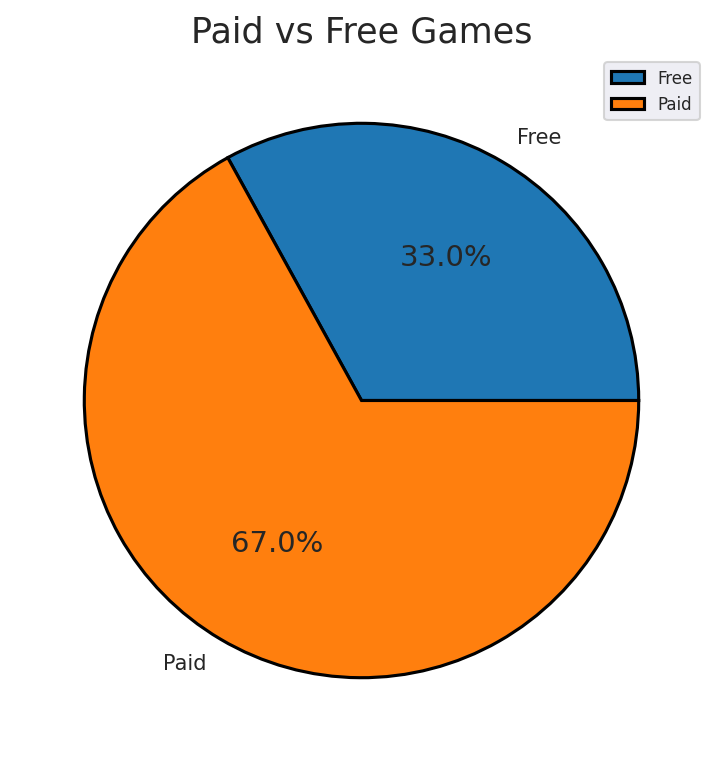

In [ ]:
price_type_df = df.groupby('price_type', as_index = False)['name'].count()
plt.pie('name', labels = 'price_type', data = price_type_df, autopct = '%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'})
plt.legend(labels = price_type_df.price_type, loc = 'best', fontsize = 8)
plt.title('Paid vs Free Games');

Ovaj kružni grafikon pokazuje da je od svih predstavljenih igara, trećina (33%) klasifikovana kao „Free to play“, dok su preostale dve trećine (67%) igre koje se plaćaju.

In [ ]:
# Utisci steam korisnika(Koliko igara ima pozitivnih kritika)
percent_df = df.groupby(['review_percentage', 'price_type'], as_index = False)['name'].count()
percent_df['review_percentage'] = percent_df['review_percentage'].str.rstrip('%').astype(int)
percent_df["review_percentage"] = pd.to_numeric(percent_df["review_percentage"])
percent_df = percent_df.sort_values('review_percentage')

sns.barplot(x = 'review_percentage', y = 'name', data = percent_df, hue ='price_type')
plt.xticks(np.arange(0, 100, 10))
plt.suptitle('Steam Users Reviews')
plt.title('Paid vs Free', fontsize = 11)
plt.ylabel('Number of Games')
plt.xlabel('Reviews (%)')
plt.legend(loc = 'upper left');

ValueError: ignored

Na grafikonu je prikazano da većina igara ima pozitivnu ocenu. Većina igara je dobila 70% do preko 90% pozitivnih kritika.

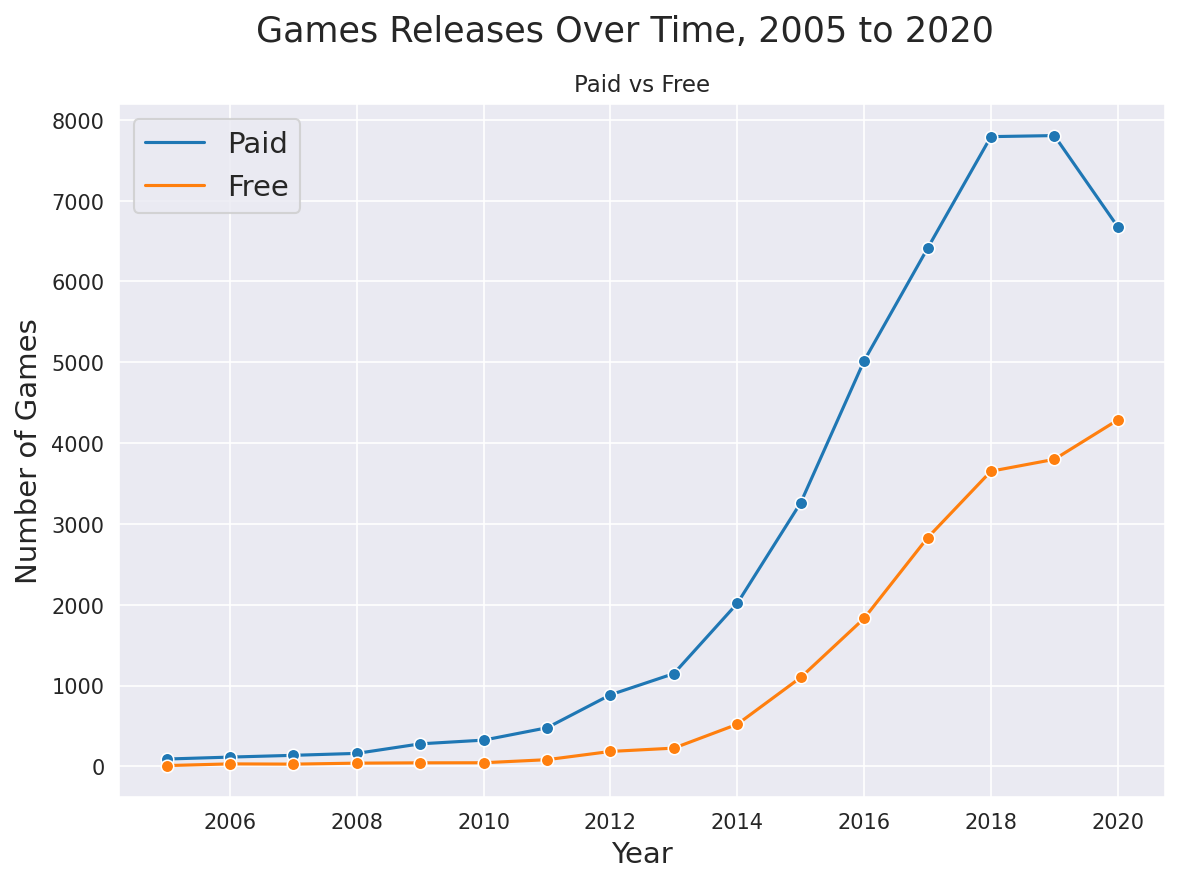

In [ ]:
# Koliko je igara izlazilo po godini od 2005 do 2020.
game_release_df = df.groupby(['year','price_type'], as_index = False)['name'].count()
game_release_df =game_release_df[(game_release_df['year'].isnull() == False)].copy()
game_release_df['year'] = game_release_df['year'].astype(int)
game_release_df = game_release_df[(game_release_df['year'] >= 2005) & (game_release_df['year'] <= 2020)]

sns.lineplot(x = 'year', y = 'name', data = game_release_df, hue = 'price_type', hue_order = ['Paid', 'Free'], marker = 'o')
plt.suptitle('Games Releases Over Time, 2005 to 2020')
plt.title('Paid vs Free', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend(loc = 'best');

Ovaj linijski grafikon pokazuje da plaćene igre izdaju više od besplatnih igara. Međutim, možemo videti mali pad kod plaćenih igara od 2019. do 2020. godine.

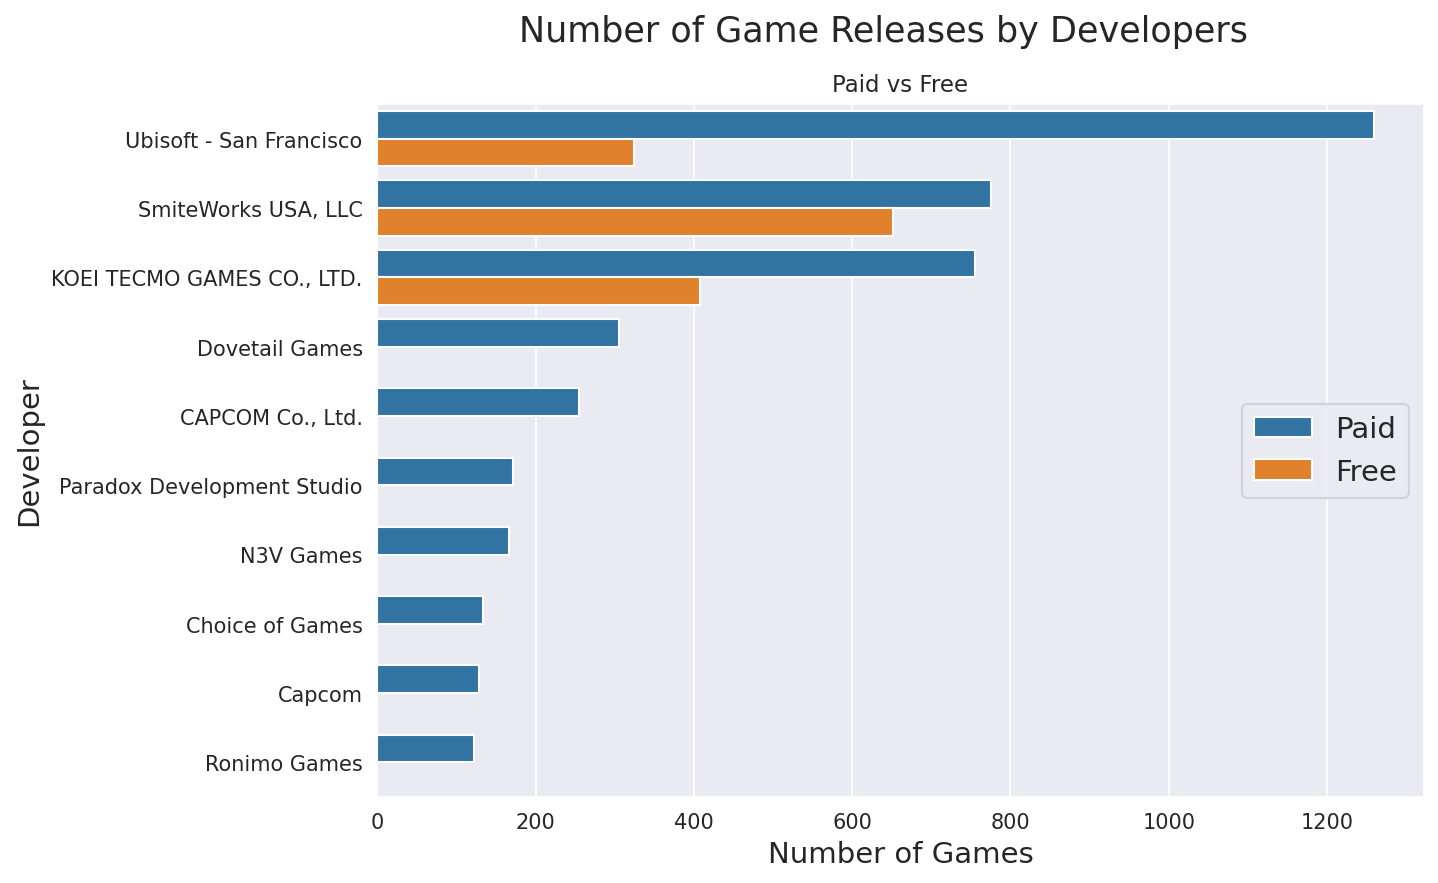

In [ ]:
# Broj igara realizovano od strane developera.
developer_df = df.groupby(['developer','price_type'], as_index = False)['name'].count().sort_values('name',ascending= False).head(15)
developer_df = developer_df[(developer_df['developer'].isin(['-']) == False)]

sns.barplot(x = 'name', y = 'developer', data = developer_df, hue = 'price_type')
plt.suptitle('Number of Game Releases by Developers')
plt.title('Paid vs Free', fontsize = 11)
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.legend(loc ='center right');

Ovaj trakasti grafikon ilustruje deset najboljih programera u Steam igrama. Vidimo da su samo tri najbolja programera objavila i besplatne i plaćene igre.

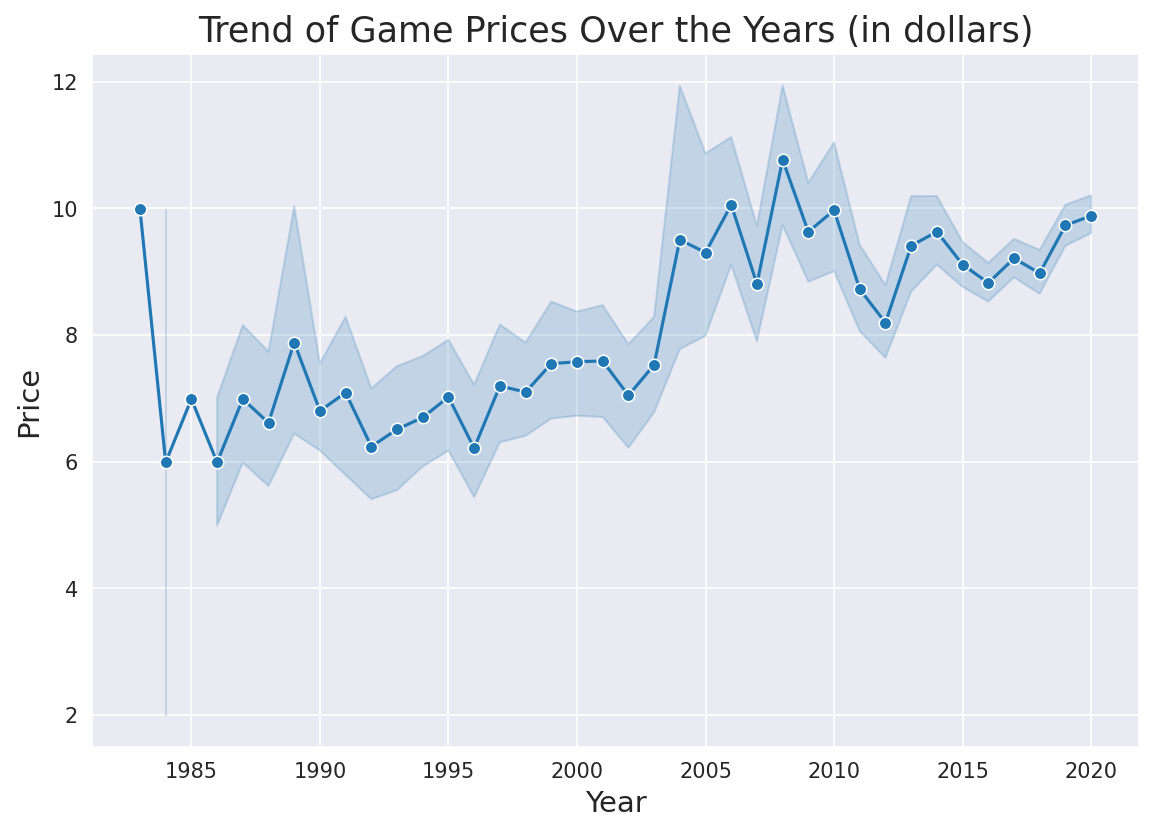

In [ ]:
# Grafikon koji prikazuje porast cene tokom godina
price_df = df[(df['price'].isin(['Free to play']) == False) & (df['year'].isin([None]) == False)].copy()
price_df.dropna(subset=['year','price'],inplace=True)
price_df['price'] = price_df['price'].astype(float)
price_df['year'] = price_df['year'].astype(int)
price_df = price_df[(price_df['year'] >= 1981) & (price_df['year'] <= 2020)]

sns.lineplot(x = 'year', y = 'price', data = price_df, marker = 'o')
plt.title('Trend of Game Prices Over the Years (in dollars)')
plt.xlabel('Year')
plt.ylabel('Price');

Ovaj linijski grafikon pokazuje da je cena igara rasla tokom godina. To pokazuje jasan trend rasta cene artikla.

 ***PRIMENA*** ***REGRESIJE***

* ***linearna*** ***regresija***

In [ ]:
# Uklonimo redove sa nedostajućim vrednostima
df = df.dropna()

# Izdvajanje nezavisne i zavisne promenljive
X = df[['year']]  # Postavimo 'year' na kolonu koju želimo koristiti kao nezavisnu promenljivu
y = df['total_reviews']  # Postavimo 'total_reviews' na ciljnu promenljivu

# Kreiranje i treniranje linearnog regresionog modela
model = LinearRegression()
model.fit(X, y)

# Ispis koeficijenata modela
print("Koeficijent pravca :", model.coef_)
print("Vrednost na Y osi:", model.intercept_)

Koeficijent pravca : [-810.85536311]
Vrednost na Y osi: 1645042.4497507608


* ***linearna*** ***višestruka*** ***regresija***

In [ ]:
# Uklonimo redove sa nedostajućim vrednostima
df = df.dropna()

# Postavljanje vrednosti u koloni 'price' na 0 gde se naiđe na 'Free to play'
df.loc[df['price'] == 'Free to play', 'price'] = 0

# Izdvajanje nezavisnih i zavisne promenljive
X = df[['year', 'price']]  # Postavimo kolone koje želite koristiti kao nezavisne promenljive
y = df['total_reviews']  # Postavimo 'total_reviews' na ciljnu promenljivu

# Kreiranje i treniranje višestrukog linearnog regresionog modela
model = LinearRegression()
model.fit(X, y)

# Ispis koeficijenata modela
print("Koeficijenti pravaca :", model.coef_)
print("Vrednost na y osi:", model.intercept_)

Koeficijenti pravaca : [-829.06854044   66.26302295]
Vrednost na y osi: 1680805.5363691212


- ***nelinearna*** ***polinomska*** ***regresija***

In [ ]:
# Postavimo vrednosti 'Free to play' na 0 u koloni 'price'
df.loc[df['price'] == 'Free to play', 'price'] = 0

# Uklonimo redove sa nedostajućim vrednostima
df = df.dropna()

# Izdvajanje nezavisnih i zavisne promenljive
X = df[['year', 'price']]  # Postavimo kolone koje želite koristiti kao nezavisne promenljive
y = df['total_reviews']  # Postavimo 'total_reviews' na ciljnu promenljivu

# Kreiramo polinomsku regresiju sa stepenom 2 (možemo promeniti stepen po potrebi)
stepen = 2
polyreg = make_pipeline(PolynomialFeatures(stepen), LinearRegression())
polyreg.fit(X, y)

# Ispis koeficijenata modela
print("Koeficijenti modela:", polyreg.named_steps['linearregression'].coef_)
print("Vrednost na y osi:", polyreg.named_steps['linearregression'].intercept_)

Koeficijenti modela: [ 0.00000000e+00  7.93965723e+05 -1.76687700e+05 -1.97767805e+02
  8.75619771e+01  1.62831194e+00]
Vrednost na y osi: -796840369.2873114


**Estimacija** **uslovnih** i **bezuslovnih** **verovatnoća** **određenih** **događaja**

In [ ]:
# Računamo bezuslovnu verovatnoću da je cena (price) jednaka nuli
P_Price_Zero = len(df[df['price'] == 0]) / len(df)
print("Bezuslovna verovatnoća da je cena (price) jednaka nuli:", P_Price_Zero)

# Postavimo prag za broj recenzija možemo promeniti vrednost po potrebi
prag_recenzija = 1000

# Računamo bezuslovnu verovatnoću da je broj recenzija (total_reviews) veći od praga
P_Reviews_Above_Threshold = len(df[df['total_reviews'] > prag_recenzija]) / len(df)
print("Bezuslovna verovatnoća da je broj recenzija (total_reviews) veći od praga:", P_Reviews_Above_Threshold)

# Računamo uslovnu verovatnoću da je cena (price) jednaka nuli pod uslovom da je broj recenzija (total_reviews) veći od praga
P_Price_Zero_Given_Reviews_Above_Threshold = len(df[(df['price'] == 0) & (df['total_reviews'] > prag_recenzija)]) / len(df[df['total_reviews'] > prag_recenzija])
print("Uslovna verovatnoća da je cena (price) jednaka nuli pod uslovom da je broj recenzija (total_reviews) veći od praga:", P_Price_Zero_Given_Reviews_Above_Threshold)


Bezuslovna verovatnoća da je cena (price) jednaka nuli: 0.20598591549295775
Bezuslovna verovatnoća da je broj recenzija (total_reviews) veći od praga: 0.6556841046277666
Uslovna verovatnoća da je cena (price) jednaka nuli pod uslovom da je broj recenzija (total_reviews) veći od praga: 0.20675105485232068


***Estimacija*** ***parametara*** ***združenih*** ***raspodela***

* ***kovarijansa***

In [ ]:
# Izbacimo redove sa nedostajućim vrednostima
df = df.dropna()

# Izdvajanje promenljivih za koje želite izračunati kovarijacionu matricu
selected_columns = ['price', 'total_reviews', 'year']  # Prilagodite ove kolone vašim potrebama

# Izdvajanje podskupa podataka sa odabranim kolonama
selected_data = df[selected_columns]

# Izračunavanje kovarijacione matrice
covariance_matrix = selected_data.cov()

# Ispisivanje kovarijacione matrice
print("Kovarijaciona matrica:")
print(covariance_matrix)

Kovarijaciona matrica:
                    price  total_reviews
price           205.11498   9.301382e+03
total_reviews  9301.38170   7.875884e+09


<ipython-input-102-b45d4cb3edca>:11: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = selected_data.cov()


* ***koeficijent*** ***korelacije***

In [ ]:
# Izbacimo redove sa nedostajućim vrednostima
df = df.dropna()

# Konvertujemo kolonu 'price' u numerički tip podataka
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # errors='coerce' će postaviti nevažeće vrednosti na NaN

# Izračunavanje koeficijenta korelacije između 'price' i 'total_reviews'
correlation_coefficient = df['price'].corr(df['total_reviews'])

# Ispis koeficijenta korelacije
print("Koeficijent korelacije između 'price' i 'total_reviews':", correlation_coefficient)

Koeficijent korelacije između 'price' i 'total_reviews': 0.007318112949433916


***Estimacija*** ***intervala*** ***poverenja*** ***određenih*** ***parametara***

In [ ]:
# Izbacimo redove sa nedostajućim vrednostima
df = df.dropna()

# Izaberemo promenljivu za koju želite da izračunate interval poverenja (npr. 'total_reviews')
selected_variable = 'total_reviews'

# Izračunavanje srednje vrednosti (proseka) za odabranu promenljivu
mean_value = df[selected_variable].mean()

# Nivo značajnosti za interval poverenja (npr. 95%)
confidence_level = 0.95

# Izračunavanje standardne greške srednje vrednosti
standard_error = stats.sem(df[selected_variable])

# Izračunavanje intervala poverenja
confidence_interval = stats.t.interval(confidence_level, len(df) - 1, loc=mean_value, scale=standard_error)

# Ispisivanje intervala poverenja
print("Interval poverenja za srednju vrednost '{}' na {}% nivou poverenja:".format(selected_variable, int(confidence_level * 100)))
print("Donja granica: {:.2f}".format(confidence_interval[0]))
print("Gornja granica: {:.2f}".format(confidence_interval[1]))

Interval poverenja za srednju vrednost 'total_reviews' na 95% nivou poverenja:
Donja granica: 7463.27
Gornja granica: 12981.97


***Testiranje*** ***parametarskih*** ***hipoteza***

In [ ]:
# Izbacimo redove sa nedostajućim vrednostima u koloni 'total_reviews'
df = df.dropna(subset=['total_reviews'])

# Izdvajanje podataka za igre koje su "Free to play" i igre koje nisu
free_to_play = df[df['price_type'] == 'Free']['total_reviews']
not_free_to_play = df[df['price_type'] == 'Paid']['total_reviews']

# Izračunamo t-test za nezavisne uzorke
t_statistic, p_value = stats.ttest_ind(free_to_play, not_free_to_play)

# Nivo značajnosti (alfa vrednost, obično postavljena na 0.05)
alpha = 0.05

# Provera statističke značajnosti p-vrednosti u odnosu na nivo značajnosti
if p_value < alpha:
    print("Postoji statistički značajna razlika u broju recenzija između Free to play i plaćenih igara.")
else:
    print("Nema statistički značajne razlike u broju recenzija između Free to play i plaćenih igara.")

Postoji statistički značajna razlika u broju recenzija između Free to play i plaćenih igara.
